# TIME SERIES ANALYSIS

**Forecasting using ARCH/GARCH Modelling**

In [58]:
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt
from arch import arch_model
from arch.unitroot import PhillipsPerron,KPSS,ADF
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

**DATASET**
<br>
The dataset used the **Walmart stock price** data of the last five years from 27-10-2015 to 26-10-2020

In [3]:
data=pd.read_csv('WMT.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-27,58.009998,58.040001,57.380001,57.480000,50.770065,10511400
1,2015-10-28,57.660000,57.720001,57.160000,57.639999,50.911388,11834700
2,2015-10-29,57.720001,58.119999,57.480000,57.959999,51.194035,12855500
3,2015-10-30,57.730000,58.119999,57.240002,57.240002,50.558086,15805500
4,2015-11-02,57.290001,57.610001,56.770000,57.610001,50.884892,10719200
...,...,...,...,...,...,...,...
1254,2020-10-20,144.110001,145.529999,143.619995,143.899994,143.899994,4841000
1255,2020-10-21,143.839996,145.729996,143.839996,144.399994,144.399994,4371400
1256,2020-10-22,144.190002,144.559998,142.690002,143.550003,143.550003,4448000
1257,2020-10-23,143.970001,144.139999,142.850006,143.850006,143.850006,3513500


Our data is already sorted chronologically.

We will consider the **Close** prices for the our time series analysis

In [156]:
data['Close'].describe()

count    1259.000000
mean       92.627157
std        21.759502
min        56.419998
25%        72.155002
50%        89.980003
75%       111.419998
max       147.679993
Name: Close, dtype: float64

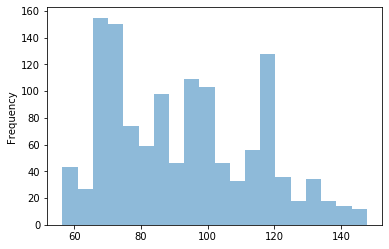

In [159]:
data['Close'].plot.hist(bins=20,alpha=0.5)

Plot for **Close** price

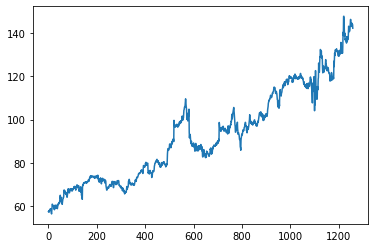

In [165]:
plt.plot(data['Close'])

**CHECK FOR STATIONARITY**

Now let us check if our data is stationary.
<br>
<b>Augmented Dickey-Fuller test</b>


In [4]:
adf_test = ADF(data['Close'])
print(adf_test.summary)
if adf_test.stat < adf_test.critical_values["5%"]:
    print ("Null hypothesis is rejected : Time Series is Stationary")
else:
    print ("Failed to reject null hypothesis : Time Series is Non-Stationary")

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                  0.186
P-value                         0.971
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
Failed to reject null hypothesis : Time Series is Non-Stationary


Since our data is **non stationary**, we proceed to do the stationary test on **log return**.

In [5]:
data['log_ret'] = np.log(data.Close) - np.log(data.Close.shift(1))
data

,Date,Open,High,Low,Close,Adj Close,Volume,log_ret
0,2015-10-27,58.009998,58.040001,57.380001,57.480000,50.770065,10511400,NaN
1,2015-10-28,57.660000,57.720001,57.160000,57.639999,50.911388,11834700,0.002780
2,2015-10-29,57.720001,58.119999,57.480000,57.959999,51.194035,12855500,0.005536
3,2015-10-30,57.730000,58.119999,57.240002,57.240002,50.558086,15805500,-0.012500
4,2015-11-02,57.290001,57.610001,56.770000,57.610001,50.884892,10719200,0.006443
...,...,...,...,...,...,...,...,...
1254,2020-10-20,144.110001,145.529999,143.619995,143.899994,143.899994,4841000,0.006624
1255,2020-10-21,143.839996,145.729996,143.839996,144.399994,144.399994,4371400,0.003469
1256,2020-10-22,144.190002,144.559998,142.690002,143.550003,143.550003,4448000,-0.005904
1257,2020-10-23,143.970001,144.139999,142.850006,143.850006,143.850006,3513500,0.002088


In [157]:
data.loc[1:]['log_ret'].describe()

count    1258.000000
mean        0.000720
std         0.013993
min        -0.107399
25%        -0.005332
50%         0.000728
75%         0.006582
max         0.110723
Name: log_ret, dtype: float64

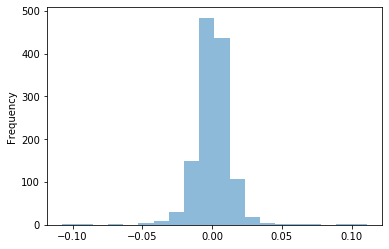

In [168]:
data.loc[1:]['log_ret'].plot.hist(bins=20,alpha=0.5)

Plot of **Log Return**

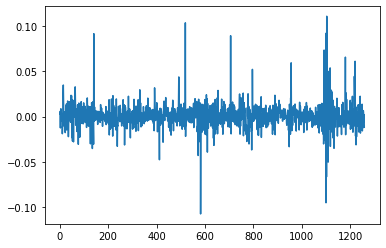

In [162]:
plt.plot(data.loc[1:]['log_ret'])

**CHECK FOR STATIONARITY**

<b>Augmented Dickey-Fuller test</b>

In [6]:
adf_test = ADF(data.loc[1:]['log_ret'])
print(adf_test.summary)
if adf_test.stat < adf_test.critical_values["5%"]:
    print ("Null hypothesis is rejected : Time Series is Stationary")
else:
    print ("Failed to reject null hypothesis : Time Series is Non-Stationary")

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                -12.632
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
Null hypothesis is rejected : Time Series is Stationary


<b>Philips-Perron test</b>

In [7]:
pp_test = PhillipsPerron(data.loc[1:]['log_ret'])
print(pp_test.summary)
if pp_test.stat < pp_test.critical_values["5%"]:
    print ("Null hypothesis is rejected : Time Series is Stationary")
else:
    print ("Fail to reject null hypothesis : Time Series is Non-Stationary")

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.PhillipsPerron'>
"""
     Phillips-Perron Test (Z-tau)    
Test Statistic                -41.818
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
Null hypothesis is rejected : Time Series is Stationary


<b>Kwiatkowski-Philips-Schmidt-Shin (KPSS) test</b>

In [8]:
kpss_test = KPSS(data.loc[1:]['log_ret'])
print(kpss_test.summary)
if kpss_test.stat < kpss_test.critical_values["5%"]:
    print ("Fail to reject null hypothesis : Time Series is Stationary")
else:
    print ("Null hypothesis is rejected: Time Series is Non-Stationary")

<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.KPSS'>
"""
    KPSS Stationarity Test Results   
Test Statistic                  0.031
P-value                         0.972
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
""">
Fail to reject null hypothesis : Time Series is Stationary


Since all three test tells us that the time series is **stationary**. 
<br>We proceed with our analysis on **log return** of **close** prices

In [114]:
forecast_time=10
train_data=data['log_ret'][1:-10]
T=len(train_data)
test_data=data['log_ret'][-10:]

We have divided our dataset into train and test. The train_data will be used for building the model. The test_data will be used to measure the performance our forecast. I have done forecasting for final **10 days**.

**Autocorrelation** and **Partial Autocorrelation**

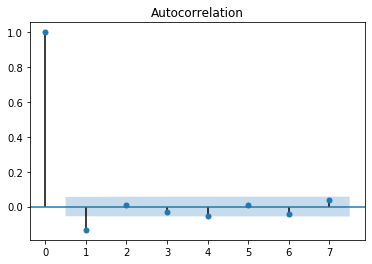

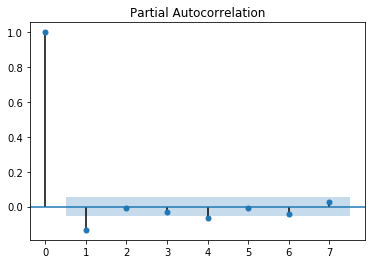

In [62]:
acf = plot_acf(train_data, lags=math.log(T))
pacf = plot_pacf(train_data, lags=math.log(T))

**FITTING THE ARMA MODEL**

In [171]:
warnings.simplefilter('ignore')
model = ARMA(train_data, order = (1,1))
result = model.fit(disp=-1)
min_AIC=result.aic
aic_p=1
aic_q=1
for i in range(1,8):
    for j in range(1,8):
        try:
            arma_model = ARMA(train_data,order=(i,j))
            result = arma_model.fit(disp=-1)
            if result.aic<min_AIC:
                min_AIC=result.aic
                aic_p=i
                aic_q=j
        except:
            continue
print("The opitmum value of (p.q) is (",aic_p,',',aic_q,')')
print("Minimum AIC value is ",min_AIC)

The opitmum value of (p.q) is ( 7 , 3 )
Minimum AIC value is  -7145.998603755827


In [172]:
model = ARMA(train_data,order=(aic_p,aic_q))
result = model.fit(disp=-1)
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                log_ret   No. Observations:                 1248
Model:                     ARMA(7, 3)   Log Likelihood                3584.999
Method:                       css-mle   S.D. of innovations              0.014
Date:                Thu, 05 Nov 2020   AIC                          -7145.999
Time:                        19:33:19   BIC                          -7084.447
Sample:                             0   HQIC                         -7122.857
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006   4.88e-05     13.216      0.000       0.001       0.001
ar.L1.log_ret    -0.7923      0.081     -9.755      0.000      -0.952      -0.633
ar.L2.log_ret     0.7181      0.053     

**Fitted Values**

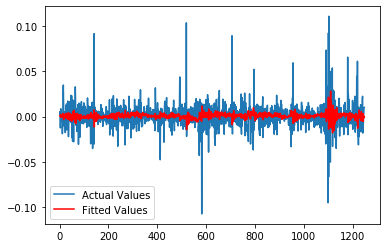

In [178]:
plt.plot(train_data,label="Actual Values")
plt.plot(result.fittedvalues, color='red',label="Fitted Values")
plt.legend()

**Forecasting using ARMA**

The root mean square error of the above model is  0.003052278922430104


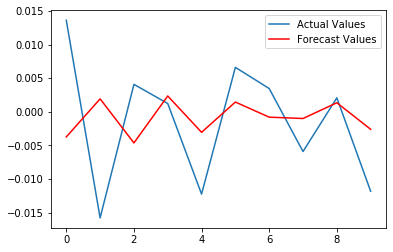

In [179]:
forecast_ARMA=result.forecast(steps=10)[0]
plt.plot(test_data.to_numpy(),label="Actual Values")
plt.plot(forecast_ARMA, color='red',label="Forecast Values")
plt.legend()
RMSE=(sum((test_data-forecast_ARMA)**2))**0.5/10
print("The root mean square error of the above model is ",RMSE)

**LJUNG-BOX TEST**

Ljung-Box test for **Residuals**

In [67]:
lb_stat,lb_pvalue=acorr_ljungbox(result.resid, lags=[math.log(T)], return_df=False)
print("Ljungbox test statistics : ",lb_stat[0])
print("Ljungbox test statistics : ",lb_pvalue[0])
if (lb_pvalue[0]<0.05):
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

Ljungbox test statistics :  0.6145595071418591
Ljungbox test statistics :  0.998909599971878
We fail to reject null hypothesis


Ljung-Box test for **square of residuals**

In [68]:
lb_stat,lb_pvalue=acorr_ljungbox(np.square(result.resid), lags=[math.log(T)], return_df=False)
print("Ljungbox test statistics : ",lb_stat[0])
print("Ljungbox test statistics : ",lb_pvalue[0])
if (lb_pvalue[0]<0.05):
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

Ljungbox test statistics :  162.11634954657535
Ljungbox test statistics :  1.150089952293833e-31
We reject null hypothesis


Since we **accept** the null hypothesis of Ljung-Box test for **residuals** using the ARMA model and **reject** the null hypothesis of Ljung-Box test for **square of residuals**, we can proceed to build the GARCH model.

**Building the GARCH MODEL**

In [182]:
model = arch_model(train_data, mean='Constant', vol='GARCH', p=1,q=1)
res = model.fit(disp=-1)
min_AIC=result.aic
aic_p=1
aic_q=1
min_BIC=result.bic
bic_p=1
bic_q=1
for i in range(1,15):
    for j in range(1,15):
        try:
            model = arch_model(train_data, mean='Constant', vol='GARCH', p=i,q=j)
            res = model.fit(disp=-1)
            if res.aic<min_AIC:
                min_AIC=res.aic
                aic_p=i
                aic_q=j
            if res.bic<min_BIC:
                min_BIC=res.bic
                bic_p=i
                bic_q=j
        except:
            continue


Iteration:      1,   Func. Count:      6,   Neg. LLF: -3712.956487146651
Iteration:      2,   Func. Count:     19,   Neg. LLF: -3713.291070721372
Iteration:      3,   Func. Count:     32,   Neg. LLF: -3713.2950923828507
Iteration:      4,   Func. Count:     47,   Neg. LLF: -3713.2951424821003
Iteration:      5,   Func. Count:     56,   Neg. LLF: -3713.380826525569
Iteration:      6,   Func. Count:     69,   Neg. LLF: -3713.4429567010584
Iteration:      7,   Func. Count:     82,   Neg. LLF: -3713.443852005955
Iteration:      8,   Func. Count:     95,   Neg. LLF: -3713.4440212719537
Iteration:      9,   Func. Count:    110,   Neg. LLF: -3713.444297643696
Iteration:     10,   Func. Count:    124,   Neg. LLF: -3713.4443219922687
Iteration:     11,   Func. Count:    140,   Neg. LLF: -3713.444346362813
Iteration:      1,   Func. Count:      6,   Neg. LLF: -3712.956487146651
Iteration:      2,   Func. Count:     19,   Neg. LLF: -3713.291070721372
Iteration:      3,   Func. Count:     32,   Ne

In [183]:
print("The opitmum value of (p.q) using AIC is (",aic_p,',',aic_q,')')
print("Minimum AIC value is ",min_AIC)
print("The opitmum value of (p.q) using BIC is (",bic_p,',',bic_q,')')
print("Minimum BIC value is ",min_BIC)

The opitmum value of (p.q) using AIC is ( 1 , 1 )
Minimum AIC value is  -7418.888690318202
The opitmum value of (p.q) using BIC is ( 1 , 1 )
Minimum BIC value is  -7398.371500122485


**Model Summary**

In [95]:
model = arch_model(train_data, mean='Constant', vol='GARCH', p=1,q=1)
res = model.fit(disp=-1)
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3712.956487146651
Iteration:      2,   Func. Count:     19,   Neg. LLF: -3713.291070721372
Iteration:      3,   Func. Count:     32,   Neg. LLF: -3713.2950923828507
Iteration:      4,   Func. Count:     47,   Neg. LLF: -3713.2951424821003
Iteration:      5,   Func. Count:     56,   Neg. LLF: -3713.380826525569
Iteration:      6,   Func. Count:     69,   Neg. LLF: -3713.4429567010584
Iteration:      7,   Func. Count:     82,   Neg. LLF: -3713.443852005955
Iteration:      8,   Func. Count:     95,   Neg. LLF: -3713.4440212719537
Iteration:      9,   Func. Count:    110,   Neg. LLF: -3713.444297643696
Iteration:     10,   Func. Count:    124,   Neg. LLF: -3713.4443219922687
Iteration:     11,   Func. Count:    140,   Neg. LLF: -3713.444346362813
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                log_ret   R-squared:                      -0.000
Mean Model:             Constant M

**Forecasting using the GARCH model**

In [125]:
forecasts = res.forecast(horizon=10)
forecast_mean = np.array(list(forecasts.mean.dropna().squeeze()))
forecast_variance =np.array(list(forecasts.variance.dropna().squeeze()))
volatility = np.array(list(forecasts.residual_variance.dropna().squeeze()))

In [185]:
RMSE=(sum((test_data-forecast_mean)**2))**0.5/10
print("The root mean square error of the above GARCH model is ",RMSE)

The root mean square error of the above GARCH model is  0.002960506091730236


**Forecast Plot**

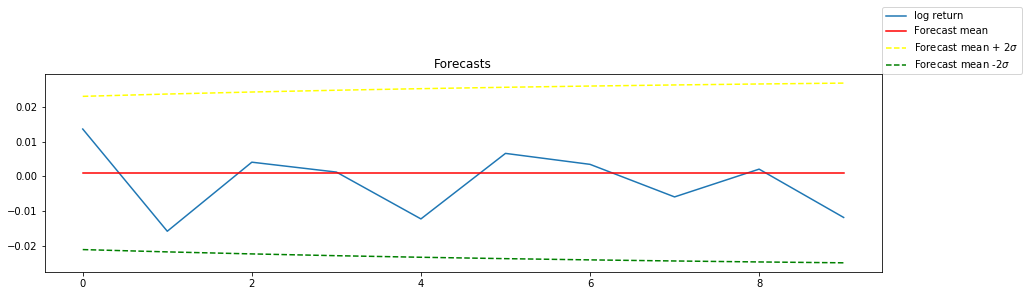

In [147]:
fig = plt.figure(figsize = (15, 8))
pt1 = fig.add_subplot(211)
pt1.plot(test_data.to_numpy(),label="log return")
pt1.plot(forecast_mean, color='red',label="Forecast mean")
pt1.plot(forecast_mean+2*np.sqrt(forecast_variance), color='yellow',linestyle='--', label="Forecast mean + $  2 \sigma$")
pt1.plot(forecast_mean-2*np.sqrt(forecast_variance), color='green',linestyle='--',label="Forecast mean -$  2 \sigma$")
plt.title("Forecasts")
plt.legend(loc=(1,1))
plt.show()